# <Font color = 'indianred'>**Specify Project Folder**

In [1]:
# Import necessary modules
from pathlib import Path
import os

# Determine if the environment is Google Colab
if 'google.colab' in str(get_ipython()):
    # Mount Google Drive to access or save files there
    from google.colab import drive
    drive.mount('/content/drive')

    # Define the base folder in Google Drive to be used for data storage
    base_folder = Path('/content/drive/MyDrive/data')

    # Install or update the fastdownload, fastai, fastcore, and kaggle packages
    # using pip. The -qq flag ensures quiet installation.
    !pip install fastdownload -qq
    !pip install fastai -U -qq
    !pip install fastcore -U -qq
    !pip install kaggle -U -qq
else:
    # If not running in Google Colab, set the base folder to a specific local path
    base_folder = Path('/home/harpreet/Insync/google_drive_shaannoor/data')


Mounted at /content/drive


In [3]:
# Set the path for the Kaggle API credentials stored in the '.kaggle' folder within the base folder
kaggle_api = base_folder/'.kaggle'


In [4]:
# Create the '.kaggle' directory if it doesn't exist; also create any necessary parent directories
kaggle_api.mkdir(exist_ok=True, parents=True)


In [5]:
str(kaggle_api)

'/content/drive/MyDrive/data/.kaggle'

In [6]:
# List all files and directories in the '.kaggle' folder, showing detailed information
!ls -la {str(kaggle_api)}


total 1
-rw------- 1 root root 62 Sep 17 13:08 kaggle.json


In [7]:
# Set the environment variable 'KAGGLE_CONFIG_DIR' to the path of '.kaggle' folder for Kaggle API authentication
import os
os.environ['KAGGLE_CONFIG_DIR'] = str(kaggle_api)


In [8]:
# Set read and write permissions for the owner on the 'kaggle.json' file for secure API access
!chmod 600 {str(kaggle_api/'kaggle.json')}

In [9]:
!ls -la {str(kaggle_api/'kaggle.json')}

-rw------- 1 root root 62 Sep 17 13:08 /content/drive/MyDrive/data/.kaggle/kaggle.json


# <Font color = 'indianred'>**Load Libraries/Install Software**

In [10]:
# Import torchvision for computer vision tasks
import torchvision

# Import tarfile for extracting and creating tarball files
import tarfile

# Import PyTorch for machine learning tasks
import torch

# Import the Kaggle API client to interact with Kaggle datasets and competitions
from kaggle import api



# <Font color = 'indianred'>**SubFolders as Class Labels**

## <Font color = 'indianred'>**Download Compressed files**

In [ ]:
# Import FastDownload for optimized, parallel downloading of files
from fastdownload import FastDownload


In [ ]:
# Initialize FastDownload object with specified base folder, archive folder for storing compressed files, and data folder for extracted datasets
d = FastDownload(base=base_folder, archive='archive', data='datasets')


In [11]:
# Define the URL for the Imagenette dataset
url = 'https://s3.amazonaws.com/fast-ai-imageclas/imagenette2.tgz'

# Download the Imagenette dataset using FastDownload and store it in the specified data folder
# data_folder_imagenette = d.get(url)


In [ ]:
# data_folder_imagenette

## <Font color = 'indianred'>**Check folders downloaded**

In [12]:
# we will use rglob which will help us to specify the pattern to search
# ** - Recursively matches zero or more directories that fall under the current directory.

for entries in (base_folder/'datasets/imagenette2').rglob('**'):
    print(entries)

/content/drive/MyDrive/data/datasets/imagenette2
/content/drive/MyDrive/data/datasets/imagenette2/val
/content/drive/MyDrive/data/datasets/imagenette2/val/n02102040
/content/drive/MyDrive/data/datasets/imagenette2/val/n01440764
/content/drive/MyDrive/data/datasets/imagenette2/val/n03000684
/content/drive/MyDrive/data/datasets/imagenette2/val/n02979186
/content/drive/MyDrive/data/datasets/imagenette2/val/n03028079
/content/drive/MyDrive/data/datasets/imagenette2/val/n03445777
/content/drive/MyDrive/data/datasets/imagenette2/val/n03425413
/content/drive/MyDrive/data/datasets/imagenette2/val/n03417042
/content/drive/MyDrive/data/datasets/imagenette2/val/n03394916
/content/drive/MyDrive/data/datasets/imagenette2/val/n03888257
/content/drive/MyDrive/data/datasets/imagenette2/train
/content/drive/MyDrive/data/datasets/imagenette2/train/n01440764
/content/drive/MyDrive/data/datasets/imagenette2/train/n03000684
/content/drive/MyDrive/data/datasets/imagenette2/train/n02979186
/content/drive/MyD

In [ ]:
# Dictionary to map the 10 classes with intergers
label_dict = {
    'n01440764' : 0,
    'n02102040' : 1,
    'n02979186' : 2,
    'n03000684' : 3,
    'n03028079' : 4,
    'n03394916' : 5,
    'n03417042' : 6,
    'n03425413' : 7,
    'n03445777' : 8,
    'n03888257' : 9
}

# Array to map integral indices with the actual class names
actual_label_dict = [
    'tench',
    'English springer',
    'cassette player',
    'chain saw',
    'church',
    'French horn',
    'garbage truck',
    'gas pump',
    'golf ball',
    'parachute'
]

## <Font color = 'indianred'>**Create Dataset**

In [13]:
# Import get_image_files and PILImage from fastai for image file handling and manipulation
from fastai.vision.all import get_image_files, PILImage

# Import parallel from fastcore for parallel computation
from fastcore.parallel import parallel

# Import NumPy for numerical operations
import numpy as np

# Import pandas for data manipulation and analysis
import pandas as pd


In [ ]:
# Retrieve all image files from the 'imagenette2' folder inside the 'datasets' directory in the base folder
image_files = get_image_files(base_folder/'datasets/imagenette2')


In [ ]:
image_files

(#13394) [Path('/home/harpreet/Insync/google_drive_shaannoor/data/datasets/imagenette2/val/n03425413/n03425413_2951.JPEG'),Path('/home/harpreet/Insync/google_drive_shaannoor/data/datasets/imagenette2/val/n03425413/n03425413_15630.JPEG'),Path('/home/harpreet/Insync/google_drive_shaannoor/data/datasets/imagenette2/val/n03425413/n03425413_21032.JPEG'),Path('/home/harpreet/Insync/google_drive_shaannoor/data/datasets/imagenette2/val/n03425413/n03425413_7582.JPEG'),Path('/home/harpreet/Insync/google_drive_shaannoor/data/datasets/imagenette2/val/n03425413/n03425413_20042.JPEG'),Path('/home/harpreet/Insync/google_drive_shaannoor/data/datasets/imagenette2/val/n03425413/n03425413_10942.JPEG'),Path('/home/harpreet/Insync/google_drive_shaannoor/data/datasets/imagenette2/val/n03425413/n03425413_13382.JPEG'),Path('/home/harpreet/Insync/google_drive_shaannoor/data/datasets/imagenette2/val/n03425413/n03425413_13620.JPEG'),Path('/home/harpreet/Insync/google_drive_shaannoor/data/datasets/imagenette2/val

(500, 375)


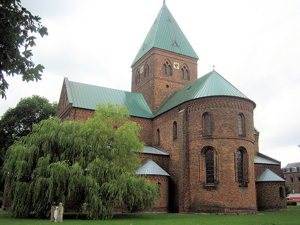

In [ ]:
# Generate a random index from the range of total image files (13394 in this case)
index = (np.random.choice(np.arange(13394), 1)).item()

# Create a PILImage object using a randomly selected image file from the 'image_files' list
img = PILImage.create(image_files[index])

# Print the dimensions of the selected image
print(img.size)

# Create and return a thumbnail of the image with a height of 300 pixels
img.to_thumb(h=300)


In [ ]:
def get_img_size(file):
    """
    Get the dimensions of an image file.

    Parameters:
    file (Path or str): The path to the image file.

    Returns:
    tuple: The dimensions of the image (width, height).
    """
    return PILImage.create(file).size


In [ ]:
# Retrieve dimensions of all image files in parallel for performance optimization, with a progress bar enabled
img_sizes = parallel(get_img_size, image_files, progress=True)


In [ ]:
pd.Series(img_sizes).value_counts()

(500, 375)      3134
(500, 333)      1174
(375, 500)      1041
(333, 500)       432
(500, 334)       276
                ... 
(214, 215)         1
(460, 276)         1
(400, 248)         1
(250, 279)         1
(2032, 1354)       1
Name: count, Length: 2914, dtype: int64

### <Font color = 'indianred'>**Transforms**

In [ ]:
from torchvision import transforms

# Define preprocessing transformations for training and testing datasets
data_transforms = {
    "train": transforms.Compose(
        [
            # Resize the shorter side of the image to 640 pixels
            transforms.Resize(640),
            # Perform a random crop to obtain a 427x427 image
            transforms.RandomCrop((427, 427)),
            # Convert image to PyTorch tensor
            transforms.ToTensor(),
            # Normalize tensor values to range [-1, 1]
            transforms.Normalize((0.5,), (0.5,)),
        ]
    ),
    "test": transforms.Compose(
        [
            # Resize the shorter side of the image to 640 pixels
            transforms.Resize(640),
            # Perform a center crop to obtain a 427x427 image
            transforms.CenterCrop((427, 427)),
            # Convert image to PyTorch tensor
            transforms.ToTensor(),
            # Normalize tensor values to range [-1, 1]
            transforms.Normalize((0.5,), (0.5,)),
        ]
    ),
}


In [ ]:
# Create a training dataset from the 'train' folder of the 'imagenette2' dataset, applying the defined 'train' transformations
trainset = torchvision.datasets.ImageFolder(base_folder/'datasets/imagenette2/train', transform=data_transforms['train'])

# Create a test and validation dataset from the 'val' folder of the 'imagenette2' dataset, applying the defined 'test' transformations
test_val_set = torchvision.datasets.ImageFolder(base_folder/'datasets/imagenette2/val', transform=data_transforms['test'])


In [ ]:
test_val_set.class_to_idx

{'n01440764': 0,
 'n02102040': 1,
 'n02979186': 2,
 'n03000684': 3,
 'n03028079': 4,
 'n03394916': 5,
 'n03417042': 6,
 'n03425413': 7,
 'n03445777': 8,
 'n03888257': 9}

In [ ]:
trainset.class_to_idx

{'n01440764': 0,
 'n02102040': 1,
 'n02979186': 2,
 'n03000684': 3,
 'n03028079': 4,
 'n03394916': 5,
 'n03417042': 6,
 'n03425413': 7,
 'n03445777': 8,
 'n03888257': 9}

In [ ]:
len(trainset), len(test_val_set)

(9469, 3925)

## <Font color = 'indianred'>**Create Test/Val Split**

In [ ]:
def split_dataset(base_dataset, fraction, seed):
    """
    Splits a given PyTorch Dataset into two parts, according to a specified fraction.

    Parameters:
    base_dataset (torch.utils.data.Dataset): The original dataset to be split.
    fraction (float): The fraction of the dataset to be used for the first split. Should be between 0 and 1.
    seed (int): The random seed for reproducibility.

    Returns:
    tuple: Two PyTorch Datasets obtained by randomly splitting the base dataset.
    """
    # Calculate the size of the first split
    split_a_size = int(fraction * len(base_dataset))
    # Calculate the size of the second split
    split_b_size = len(base_dataset) - split_a_size

    # Perform the split and return
    return torch.utils.data.random_split(
        base_dataset,
        [split_a_size, split_b_size],
        generator=torch.Generator().manual_seed(seed)
    )


In [ ]:
# Split the 'test_val_set' dataset into two equal parts, one for testing and another for validation, using a seed of 42 for reproducibility
testset, validset = split_dataset(test_val_set, 0.5, 42)


In [ ]:
testset[0][0].shape

torch.Size([3, 427, 427])

## <Font color = 'indianred'>**Create DataLoaders**

In [ ]:
# Initialize a DataLoader for the training set with batch size of 256 and shuffling enabled
train_loader = torch.utils.data.DataLoader(trainset, batch_size=256, shuffle=True)

# Initialize a DataLoader for the validation set with batch size of 256 and shuffling disabled
valid_loader = torch.utils.data.DataLoader(validset, batch_size=256, shuffle=False)

# Initialize a DataLoader for the test set with batch size of 256 and shuffling disabled
test_loader = torch.utils.data.DataLoader(testset, batch_size=256, shuffle=False)


In [ ]:
print(len(train_loader), len(valid_loader), len(test_loader))

37 8 8


## <Font color = 'indianred'>**Check Data Loaders**

In [ ]:
def check_loader(loader):
    """
    Prints the shape of image and label batches from the DataLoader.

    Parameters:
    loader (torch.utils.data.DataLoader): DataLoader instance containing the dataset.

    Side Effects:
    Prints the batch number, image shape, and label shape for the first three batches in the DataLoader.
    Prints the labels from the last processed batch.
    """
    num_epochs = 1  # Number of epochs to iterate through; set to 1 to check DataLoader

    # Loop through each epoch (only one epoch in this case)
    for epoch in range(num_epochs):
        # Enumerate through the DataLoader, getting the index and (image, label) tuple for each batch
        for idx, (image, label) in enumerate(loader):
            # Limit the check to the first 3 batches
            if idx >= 3:
                break
            # Print batch number, batch size, and shapes of the image and label tensors
            print(f" Batch Number: {idx+1} | Batch size: {image.shape[0]} | x shape: {image.shape} | y shape: {label.shape}")

    # Print labels from the last processed batch
    print(f"\nLabels from current batch \n {label}")


In [ ]:
check_loader(train_loader)

 Batch Number: 1 | Batch size: 256 | x shape: torch.Size([256, 3, 427, 427]) | y shape: torch.Size([256])
 Batch Number: 2 | Batch size: 256 | x shape: torch.Size([256, 3, 427, 427]) | y shape: torch.Size([256])
 Batch Number: 3 | Batch size: 256 | x shape: torch.Size([256, 3, 427, 427]) | y shape: torch.Size([256])

Labels from current batch 
 tensor([0, 4, 4, 6, 8, 1, 0, 8, 6, 8, 0, 5, 2, 5, 4, 6, 1, 1, 0, 9, 9, 2, 7, 0,
        8, 2, 7, 4, 5, 2, 8, 0, 1, 0, 7, 9, 0, 0, 5, 9, 7, 4, 6, 4, 6, 3, 4, 5,
        0, 9, 8, 1, 5, 4, 4, 9, 4, 8, 4, 1, 0, 0, 5, 6, 7, 8, 7, 5, 0, 1, 7, 2,
        3, 8, 5, 2, 5, 9, 5, 5, 1, 1, 2, 1, 5, 0, 7, 4, 1, 8, 2, 8, 0, 5, 5, 7,
        7, 0, 6, 2, 3, 7, 4, 2, 5, 2, 7, 9, 9, 3, 3, 1, 0, 1, 7, 7, 8, 1, 9, 4,
        7, 4, 5, 8, 2, 2, 4, 1, 8, 4, 8, 6, 6, 9, 8, 6, 1, 2, 0, 7, 5, 5, 7, 1,
        6, 4, 7, 4, 0, 8, 7, 1, 3, 8, 9, 0, 5, 5, 8, 7, 8, 6, 9, 6, 2, 0, 1, 4,
        8, 8, 1, 2, 3, 1, 9, 2, 1, 6, 3, 7, 1, 8, 7, 5, 4, 6, 1, 5, 7, 3, 1, 9,
        9, 8,

In [ ]:
check_loader(valid_loader)

 Batch Number: 1 | Batch size: 256 | x shape: torch.Size([256, 3, 427, 427]) | y shape: torch.Size([256])
 Batch Number: 2 | Batch size: 256 | x shape: torch.Size([256, 3, 427, 427]) | y shape: torch.Size([256])
 Batch Number: 3 | Batch size: 256 | x shape: torch.Size([256, 3, 427, 427]) | y shape: torch.Size([256])

Labels from current batch 
 tensor([1, 0, 1, 2, 7, 2, 8, 5, 7, 5, 7, 5, 9, 3, 3, 9, 7, 1, 0, 1, 3, 6, 3, 5,
        2, 2, 7, 6, 6, 7, 5, 6, 7, 7, 5, 9, 0, 8, 0, 5, 5, 4, 2, 2, 6, 9, 1, 3,
        7, 7, 5, 1, 5, 2, 4, 9, 8, 6, 1, 3, 2, 8, 4, 7, 8, 9, 9, 1, 4, 2, 2, 1,
        4, 0, 5, 4, 5, 1, 5, 4, 1, 4, 4, 2, 3, 1, 8, 7, 6, 6, 8, 1, 6, 8, 3, 0,
        3, 1, 0, 9, 7, 1, 6, 8, 2, 8, 1, 2, 2, 7, 8, 0, 8, 7, 6, 4, 7, 7, 5, 0,
        3, 8, 2, 4, 5, 8, 9, 3, 4, 7, 5, 2, 3, 9, 0, 5, 1, 9, 1, 2, 5, 9, 5, 9,
        5, 2, 5, 0, 6, 7, 4, 1, 3, 7, 3, 9, 9, 0, 5, 2, 3, 2, 4, 6, 5, 4, 0, 9,
        5, 6, 5, 5, 4, 7, 7, 1, 0, 5, 9, 2, 8, 5, 8, 2, 7, 1, 7, 0, 6, 6, 7, 7,
        7, 5,

In [ ]:
check_loader(test_loader)

 Batch Number: 1 | Batch size: 256 | x shape: torch.Size([256, 3, 427, 427]) | y shape: torch.Size([256])
 Batch Number: 2 | Batch size: 256 | x shape: torch.Size([256, 3, 427, 427]) | y shape: torch.Size([256])
 Batch Number: 3 | Batch size: 256 | x shape: torch.Size([256, 3, 427, 427]) | y shape: torch.Size([256])

Labels from current batch 
 tensor([6, 0, 4, 3, 2, 6, 8, 0, 5, 5, 2, 2, 7, 2, 7, 1, 1, 1, 6, 3, 2, 1, 7, 2,
        9, 3, 2, 9, 2, 6, 6, 6, 5, 8, 7, 0, 1, 3, 6, 3, 8, 3, 9, 0, 7, 7, 1, 5,
        4, 3, 0, 8, 3, 8, 0, 3, 3, 1, 4, 9, 0, 5, 2, 2, 2, 5, 1, 5, 5, 1, 6, 0,
        3, 7, 4, 4, 9, 7, 3, 6, 3, 3, 6, 7, 6, 5, 6, 8, 4, 6, 5, 8, 5, 4, 0, 0,
        6, 3, 6, 9, 8, 2, 5, 0, 1, 3, 6, 7, 6, 4, 0, 9, 5, 8, 3, 9, 7, 8, 4, 5,
        5, 7, 8, 4, 4, 6, 9, 7, 8, 5, 1, 4, 8, 0, 4, 5, 0, 3, 3, 2, 6, 8, 8, 6,
        5, 7, 6, 6, 8, 3, 5, 7, 3, 1, 2, 3, 6, 2, 8, 5, 8, 5, 7, 9, 2, 3, 0, 0,
        1, 6, 8, 5, 5, 0, 8, 0, 9, 5, 8, 0, 1, 0, 8, 3, 8, 2, 6, 8, 0, 1, 1, 0,
        9, 9,

# <Font color = 'indianred'>**Image file names and corresponding labels in a csv file**

## <Font color = 'indianred'>**Download file from Kaggle Competition**

In [ ]:
# Download the 'dog-breed-identification' competition dataset from Kaggle and save it in the 'archive' folder within 'base_folder'
!kaggle competitions download -c dog-breed-identification -p {base_folder/'archive'}


dog-breed-identification.zip: Skipping, found more recently modified local copy (use --force to force download)


## <Font color = 'indianred'>**Check Files**

In [ ]:
import zipfile

# Define the path to the downloaded 'dog-breed-identification' zip file
file = base_folder/'archive/dog-breed-identification.zip'

# Open the zip file and read its contents
with zipfile.ZipFile(file, 'r') as zip_ref:
    # Get the list of file names contained in the zip file
    zip_file_names = zip_ref.namelist()

# Print the first 10 file names from the zip file
print(zip_file_names[0:10])



['labels.csv', 'sample_submission.csv', 'test/000621fb3cbb32d8935728e48679680e.jpg', 'test/00102ee9d8eb90812350685311fe5890.jpg', 'test/0012a730dfa437f5f3613fb75efcd4ce.jpg', 'test/001510bc8570bbeee98c8d80c8a95ec1.jpg', 'test/001a5f3114548acdefa3d4da05474c2e.jpg', 'test/00225dcd3e4d2410dd53239f95c0352f.jpg', 'test/002c2a3117c2193b4d26400ce431eebd.jpg', 'test/002c58d413a521ae8d1a5daeb35fc803.jpg']


In [ ]:
d = FastDownload(base=base_folder, archive='archive', data='datasets')

In [ ]:
# image_files_path = d.extract(base_folder/'archive/dog-breed-identification.zip')

In [ ]:
image_files_path = base_folder/'datasets/dog-breed-identification'
image_files_path

Path('/home/harpreet/Insync/google_drive_shaannoor/data/datasets/dog-breed-identification')

In [ ]:
image_files = get_image_files(image_files_path)

In [ ]:
len(image_files)

20579

In [ ]:
img_sizes = parallel(get_img_size,image_files, progress=True)

In [ ]:
len(img_sizes)

20579

In [ ]:
pd.Series(img_sizes).value_counts()

(500, 375)      5301
(500, 333)      2098
(375, 500)      1225
(333, 500)       706
(500, 334)       356
                ... 
(2304, 1728)       1
(571, 337)         1
(461, 479)         1
(405, 545)         1
(368, 399)         1
Name: count, Length: 4542, dtype: int64

In [ ]:
# Display the first 20 lines of the 'labels.csv' file located in the directory specified by 'image_files_path'
!head {Path(image_files_path)/'labels.csv'} -n 20


id,breed
000bec180eb18c7604dcecc8fe0dba07,boston_bull
001513dfcb2ffafc82cccf4d8bbaba97,dingo
001cdf01b096e06d78e9e5112d419397,pekinese
00214f311d5d2247d5dfe4fe24b2303d,bluetick
0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
002211c81b498ef88e1b40b9abf84e1d,bedlington_terrier
00290d3e1fdd27226ba27a8ce248ce85,bedlington_terrier
002a283a315af96eaea0e28e7163b21b,borzoi
003df8b8a8b05244b1d920bb6cf451f9,basenji
0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound
004396df1acd0f1247b740ca2b14616e,shetland_sheepdog
0067dc3eab0b3c3ef0439477624d85d6,walker_hound
00693b8bc2470375cc744a6391d397ec,maltese_dog
006cc3ddb9dc1bd827479569fcdc52dc,bluetick
0075dc49dab4024d12fafe67074d8a81,norfolk_terrier
00792e341f3c6eb33663e415d0715370,african_hunting_dog
007b5a16db9d9ff9d7ad39982703e429,wire-haired_fox_terrier
007b8a07882822475a4ce6581e70b1f8,redbone
007ff9a78eba2aebb558afea3a51c469,lakeland_terrier


## <Font color = 'indianred'>**Create Dataset**

### <Font color = 'indianred'>**Dataset Class**

In [ ]:
from fastai.vision.all import PILImage
from pathlib import Path
import pandas as pd
from torch.utils.data import Dataset

class MyDataset(Dataset):
    """
    Custom dataset for handling image data along with optional labels.

    Attributes:
    img_folder (Path): Path to the directory containing the images.
    transform (callable, optional): A function/transform to apply to the images.
    has_labels (bool): Flag to check if the dataset has labels.
    img_names (list): List of image file names.
    labels (Series): Pandas Series containing labels, if available.
    label_to_idx (dict): Mapping from label names to numerical indices, if labels are available.
    """
    def __init__(self, img_folder, csv_file=None, transform=None, has_labels=True):
        self.img_folder = Path(img_folder)  # Convert to Path object for filesystem safety
        self.transform = transform  # Store the transform function
        self.has_labels = has_labels  # Flag to indicate presence of labels

        # If dataset has labels, read them from csv file
        if self.has_labels:
            df = pd.read_csv(csv_file)
            self.img_names = df["id"]
            self.labels = df["breed"]
            # Create a mapping from unique labels to indices
            unique_labels = self.labels.unique()
            self.label_to_idx = {label: i for i, label in enumerate(unique_labels)}
        else:
            # Get image names from the folder if no labels
            self.img_names = [f.stem for f in self.img_folder.glob('*.jpg')]

    def __len__(self):
        """Returns the number of items in the dataset."""
        return len(self.img_names)

    def __getitem__(self, index):
        """Retrieve and optionally transform the item (image, label) at the given index."""
        # Construct the full image file path
        img_name_with_extension = f"{self.img_names[index]}.jpg"
        img_path = self.img_folder / img_name_with_extension

        # Load the image
        img = PILImage.create(img_path)

        # Apply the transformation, if any
        if self.transform:
            img = self.transform(img)

        # Return image and label if labels exist
        if self.has_labels:
            label_str = self.labels[index]
            label = self.label_to_idx[label_str]
            return img, label
        else:
            # If no labels, just return the image
            return img


### <Font color = 'indianred'>**Transforms**

In [ ]:
from torchvision import transforms

data_transforms = {
    "train": transforms.Compose(
        [
            transforms.Resize(640),
            transforms.RandomCrop((427, 427)),
            transforms.ToTensor(),
            # normalize images to [-1, 1] range
            transforms.Normalize((0.5,), (0.5,)),
        ]
    ),
    "test": transforms.Compose(
        [
            transforms.Resize(640),
            transforms.CenterCrop((427, 427)),
            transforms.ToTensor(),
            # normalize images to [-1, 1] range
            transforms.Normalize((0.5,), (0.5,)),
        ]
    ),
}

### <Font color = 'indianred'>**Instantiate Dataset Class**

In [ ]:
csv_file = image_files_path/'labels.csv'
train_dir = image_files_path/'train'
test_dir = image_files_path/'test'
train_val_set = MyDataset(img_folder=train_dir, csv_file=csv_file)
testset = MyDataset(img_folder=test_dir, transform=data_transforms['test'], has_labels = False)

### <Font color = 'indianred'>**Check Data**

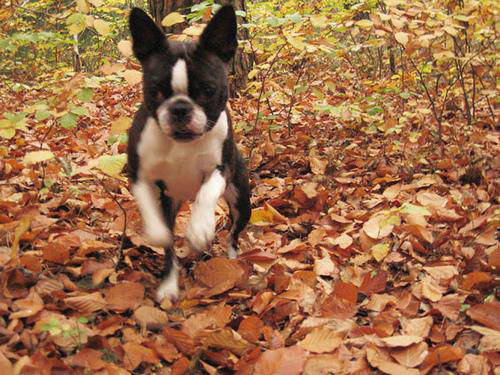

In [ ]:
train_val_set[0][0]

In [ ]:
train_val_set[0][1]

0

In [ ]:
testset[0]

tensor([[[-0.8510, -0.8510, -0.8588,  ..., -0.8118, -0.8118, -0.8118],
         [-0.8431, -0.8510, -0.8667,  ..., -0.8196, -0.8196, -0.8196],
         [-0.8431, -0.8510, -0.8667,  ..., -0.8196, -0.8196, -0.8196],
         ...,
         [-0.7176, -0.7255, -0.7647,  ..., -0.7098, -0.7333, -0.7569],
         [-0.6863, -0.6863, -0.6941,  ..., -0.7176, -0.7412, -0.7647],
         [-0.6000, -0.5843, -0.5686,  ..., -0.7412, -0.7647, -0.7804]],

        [[-0.4667, -0.4745, -0.4745,  ..., -0.4353, -0.4431, -0.4431],
         [-0.4588, -0.4667, -0.4824,  ..., -0.4431, -0.4510, -0.4510],
         [-0.4588, -0.4667, -0.4824,  ..., -0.4431, -0.4510, -0.4510],
         ...,
         [-0.4824, -0.4902, -0.5294,  ..., -0.6000, -0.6078, -0.6157],
         [-0.4510, -0.4510, -0.4588,  ..., -0.6078, -0.6078, -0.6157],
         [-0.3647, -0.3490, -0.3333,  ..., -0.6235, -0.6157, -0.6235]],

        [[-0.2000, -0.2000, -0.2078,  ..., -0.1373, -0.1373, -0.1373],
         [-0.2078, -0.2157, -0.2235,  ..., -0

In [ ]:
train_val_set.label_to_idx

{'boston_bull': 0,
 'dingo': 1,
 'pekinese': 2,
 'bluetick': 3,
 'golden_retriever': 4,
 'bedlington_terrier': 5,
 'borzoi': 6,
 'basenji': 7,
 'scottish_deerhound': 8,
 'shetland_sheepdog': 9,
 'walker_hound': 10,
 'maltese_dog': 11,
 'norfolk_terrier': 12,
 'african_hunting_dog': 13,
 'wire-haired_fox_terrier': 14,
 'redbone': 15,
 'lakeland_terrier': 16,
 'boxer': 17,
 'doberman': 18,
 'otterhound': 19,
 'standard_schnauzer': 20,
 'irish_water_spaniel': 21,
 'black-and-tan_coonhound': 22,
 'cairn': 23,
 'affenpinscher': 24,
 'labrador_retriever': 25,
 'ibizan_hound': 26,
 'english_setter': 27,
 'weimaraner': 28,
 'giant_schnauzer': 29,
 'groenendael': 30,
 'dhole': 31,
 'toy_poodle': 32,
 'border_terrier': 33,
 'tibetan_terrier': 34,
 'norwegian_elkhound': 35,
 'shih-tzu': 36,
 'irish_terrier': 37,
 'kuvasz': 38,
 'german_shepherd': 39,
 'greater_swiss_mountain_dog': 40,
 'basset': 41,
 'australian_terrier': 42,
 'schipperke': 43,
 'rhodesian_ridgeback': 44,
 'irish_setter': 45,
 'a

In [ ]:
len(train_val_set), len(testset)

(10222, 10357)

## <Font color = 'indianred'>**Create Train/Val split**

In [ ]:
def split_dataset(base_dataset, fraction, seed):
    split_a_size = int(fraction * len(base_dataset))
    split_b_size = len(base_dataset) - split_a_size

    return torch.utils.data.random_split(
        base_dataset,
        [split_a_size, split_b_size],
        generator=torch.Generator().manual_seed(seed)
    )

In [ ]:
trainset, validset = split_dataset(train_val_set, 0.8, 42)

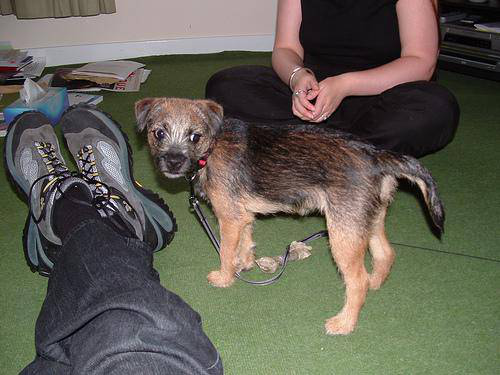

In [ ]:
trainset[0][0]

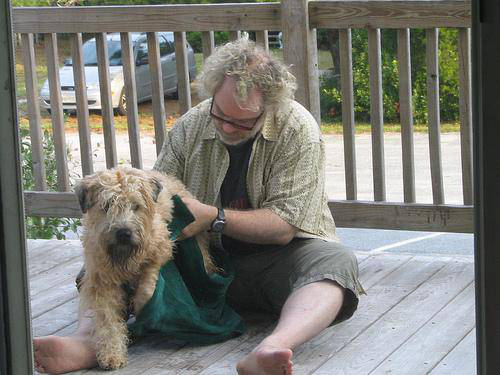

In [ ]:
validset[0][0]

In [ ]:
from torch.utils.data import Dataset

class TransformedSubset(Dataset):
    """
    A Dataset wrapper that applies a transform to a subset of a dataset.

    Attributes:
    subset (Dataset): The subset of data to which the transform will be applied.
    transform (callable, optional): A function/transform to apply to the images.
    """

    def __init__(self, subset, transform=None):
        self.subset = subset  # The original data subset
        self.transform = transform  # The transform function to apply on the data

    def __getitem__(self, index):
        """
        Retrieve and optionally transform the item (image, label) at the given index.

        Parameters:
        index (int): Index of the item to retrieve.

        Returns:
        tuple: Transformed image and label pair.
        """
        # Retrieve original data
        x, y = self.subset[index]



trainset_transformed = TransformedSubset(trainset, data_transforms['train'])
validset_transformed = TransformedSubset(validset, data_transforms['test'])


In [ ]:
trainset_transformed[0]

(tensor([[[-0.5843, -0.5686, -0.5373,  ..., -0.7804, -0.7804, -0.7804],
          [-0.5922, -0.5765, -0.5451,  ..., -0.8431, -0.8431, -0.8431],
          [-0.5843, -0.5686, -0.5451,  ..., -0.8588, -0.8510, -0.8588],
          ...,
          [-0.5216, -0.5294, -0.5529,  ...,  0.1294,  0.1216,  0.0824],
          [-0.4980, -0.5137, -0.5373,  ...,  0.1294,  0.1451,  0.1059],
          [-0.5294, -0.5216, -0.5451,  ...,  0.0980,  0.1843,  0.2471]],
 
         [[-0.5686, -0.5608, -0.5451,  ..., -0.8275, -0.8275, -0.8275],
          [-0.5765, -0.5686, -0.5451,  ..., -0.8902, -0.8902, -0.8902],
          [-0.5765, -0.5686, -0.5451,  ..., -0.9059, -0.8980, -0.9059],
          ...,
          [-0.4745, -0.4824, -0.5137,  ...,  0.2706,  0.2627,  0.2235],
          [-0.4667, -0.4745, -0.5059,  ...,  0.2784,  0.2863,  0.2471],
          [-0.5216, -0.5137, -0.5373,  ...,  0.2471,  0.3333,  0.3882]],
 
         [[-0.4980, -0.4980, -0.4824,  ..., -0.7961, -0.7961, -0.7961],
          [-0.5059, -0.5059,

In [ ]:
validset_transformed[0]

(tensor([[[-0.0353, -0.0275, -0.0196,  ..., -0.2235, -0.2078, -0.2235],
          [-0.0118, -0.0039,  0.0039,  ..., -0.2235, -0.2078, -0.2235],
          [-0.0039,  0.0118,  0.0196,  ..., -0.2235, -0.2157, -0.2235],
          ...,
          [-0.5294, -0.5529, -0.6392,  ...,  0.5922,  0.5686,  0.5529],
          [-0.5451, -0.4980, -0.5608,  ...,  0.5059,  0.5216,  0.5294],
          [-0.6235, -0.5373, -0.4980,  ...,  0.4902,  0.4980,  0.5137]],
 
         [[-0.1216, -0.1373, -0.1529,  ..., -0.2863, -0.2784, -0.2941],
          [-0.1137, -0.1216, -0.1294,  ..., -0.2863, -0.2784, -0.2941],
          [-0.0980, -0.1059, -0.1059,  ..., -0.2941, -0.2784, -0.2941],
          ...,
          [-0.5216, -0.5373, -0.6078,  ...,  0.6157,  0.5922,  0.5765],
          [-0.5294, -0.4824, -0.5373,  ...,  0.5294,  0.5451,  0.5529],
          [-0.6078, -0.5216, -0.4745,  ...,  0.5137,  0.5216,  0.5373]],
 
         [[-0.1451, -0.1686, -0.2000,  ..., -0.4275, -0.4039, -0.3882],
          [-0.1216, -0.1529,

## <Font color = 'indianred'>**Create DataLoaders**

In [ ]:
train_loader = torch.utils.data.DataLoader(trainset_transformed, batch_size=256, shuffle=True)
valid_loader = torch.utils.data.DataLoader(validset_transformed, batch_size=256, shuffle=False)
test_loader = torch.utils.data.DataLoader(testset, batch_size=256, shuffle=False)

### <Font color = 'indianred'>**Check DataLoaders**

In [ ]:
def check_loader(loader):
    """
    Inspects the first few batches from a DataLoader object to report shapes and optionally labels.

    Parameters:
    loader (torch.utils.data.DataLoader): The DataLoader to inspect.
    """
    num_epochs = 1  # Only going through one epoch for this check
    has_labels = None  # Initialize variable to store whether the dataset has labels or not

    for epoch in range(num_epochs):  # Loop through epochs (just one in this case)

        # Loop through mini-batches
        for idx, batch in enumerate(loader):
            if idx >= 3:  # Stop after checking 3 batches
                break

            # Determine if the dataset has labels based on the length of the returned tuple
            if len(batch) == 2:
                has_labels = True  # The dataset has labels
                image, label = batch  # Unpack batch into images and labels
            else:
                has_labels = False  # The dataset has no labels
                image = batch[0]  # Only images are in the batch

            # Print shape information for the images and optionally labels
            if has_labels:
                print(f" Batch Number: {idx+1} | Batch size: {image.shape[0]} | x shape: {image.shape} | y shape: {label.shape}")
            else:
                print(f" Batch Number: {idx+1} | Batch size: {image.shape[0]} | x shape: {image.shape}")

    # After the loop, print labels if available
    if has_labels:
        print(f"\nLabels from current batch \n {label}")
    else:
        print("\nNo labels in this dataset.")



In [ ]:
check_loader(train_loader)

 Batch Number: 1 | Batch size: 256 | x shape: torch.Size([256, 3, 427, 427])| y shape: torch.Size([256])
 Batch Number: 2 | Batch size: 256 | x shape: torch.Size([256, 3, 427, 427])| y shape: torch.Size([256])
 Batch Number: 3 | Batch size: 256 | x shape: torch.Size([256, 3, 427, 427])| y shape: torch.Size([256])

Labels from current batch 
 tensor([ 10,  21,  50,  62,  63,  33,  36,  96,  39,  47,  42,  87,  33, 105,
        104,  82,  23,  64,  20,  87,  95, 108,  16,  24,  23,  64,  64,  37,
        103,  69,  24, 107,  46,  52,  48, 101,  89,  73,  18,   7,  67,  30,
          0, 110,   3,  61,  28,   7,  34,   1, 100,  58, 101,  45,   1,  66,
         58,  17, 119,  77,   6,   8, 118,  11,  73,   8,   9, 106, 102,  75,
          9,  65,  16,  71,  13,  73,  11,  38,  54,  22,  98,  28,  44,   2,
        100,  71, 112,  11,  44,  75,  22,  65,  31,  35,  90,   6,  20,  89,
         54, 112,  66,  36,  74,  95,  45,  90,  48,  88,  79, 108,  99, 109,
         65,  79,   8, 109,  48,

In [ ]:
check_loader(valid_loader)

 Batch Number: 1 | Batch size: 256 | x shape: torch.Size([256, 3, 427, 427])| y shape: torch.Size([256])
 Batch Number: 2 | Batch size: 256 | x shape: torch.Size([256, 3, 427, 427])| y shape: torch.Size([256])
 Batch Number: 3 | Batch size: 256 | x shape: torch.Size([256, 3, 427, 427])| y shape: torch.Size([256])

Labels from current batch 
 tensor([ 46,  89,  99,  65, 111,  88,   3,  25,  21,  82,  61,  88,  14,  14,
         33,  15,  14,  32,  36,  26,  44,  35, 112,  24,  59,   8,  74,  55,
         77,  17, 116,  54,  68,  72,  97, 115,  65,  62,  11,  75,  43,  47,
        116,  82,  85,  50, 112,  71,  72,   3,  19,  72,  17,   8,  77,   9,
         88,   6,  27,  18,   6,  88,   7,  60, 101,  24, 110,  74,  99, 103,
         35, 111,  10,  98,  40,  48,   2,  26,  53, 117,   6,  68,  48,  34,
         91, 119,  78,  71,  90,  80,  88,  54,  58,  99,  15,  12,  83,   7,
         64,   1,  14, 105,  49,   4,  53,  80, 105,  55, 101,  30, 101,   2,
         41,   0, 113,  37,  99,

In [ ]:
check_loader(test_loader)

 Batch Number: 1 | Batch size: 256 | x shape: torch.Size([256, 3, 427, 427])
 Batch Number: 2 | Batch size: 256 | x shape: torch.Size([256, 3, 427, 427])
 Batch Number: 3 | Batch size: 256 | x shape: torch.Size([256, 3, 427, 427])

No labels in this dataset.
